<a href="https://colab.research.google.com/github/AshmitGurung/Machine-Learning-lab-PCS662/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     100 non-null    int64 
 1   Income  100 non-null    int64 
 2   Gender  100 non-null    object
 3   City    100 non-null    object
dtypes: int64(2), object(2)
memory usage: 3.3+ KB
None
   Age  Income  Gender           City
0   16   26873    Male       New York
1   17   25675  Female       New York
2   16   20161    Male        Chicago
3   16   24297    Male  San Francisco
4   16   20995    Male  San Francisco


<Figure size 1200x500 with 0 Axes>

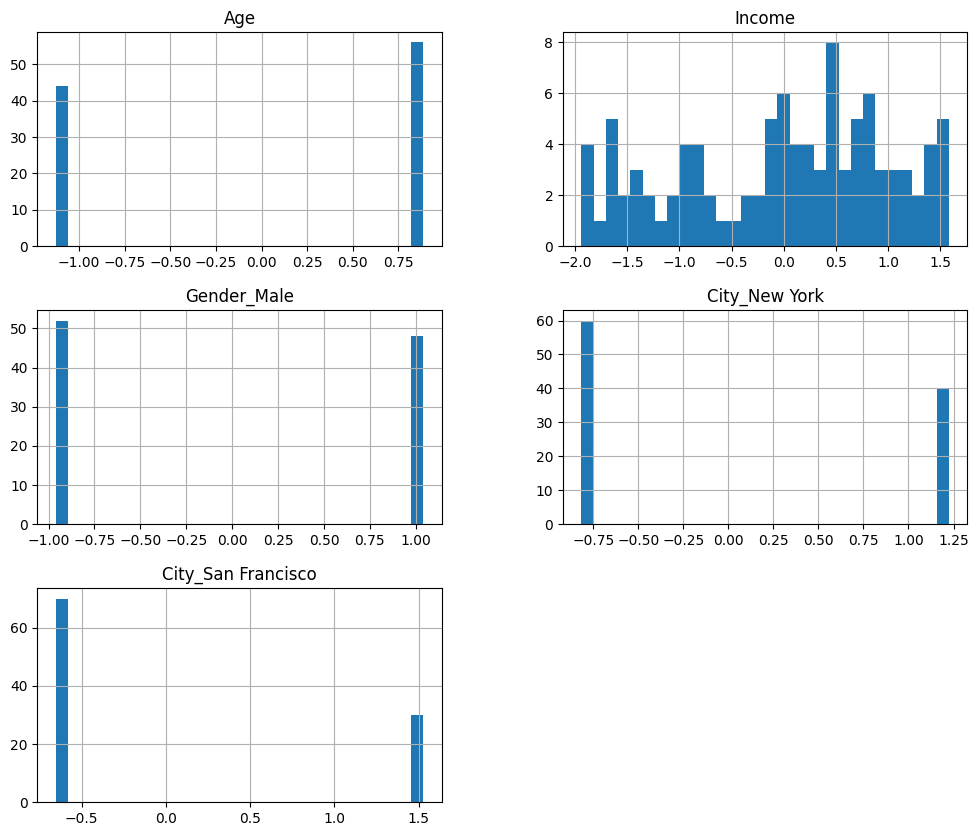

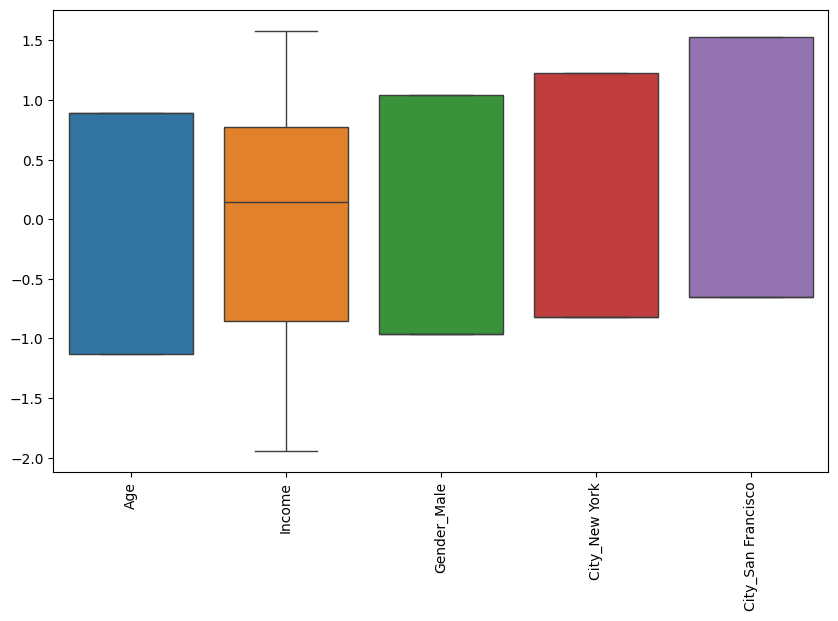

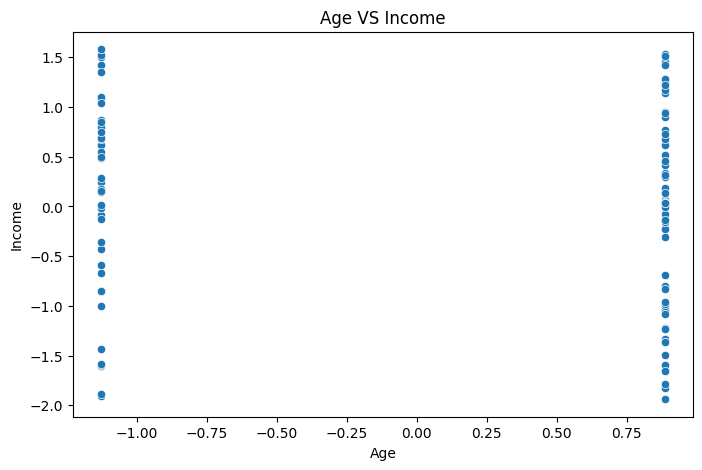

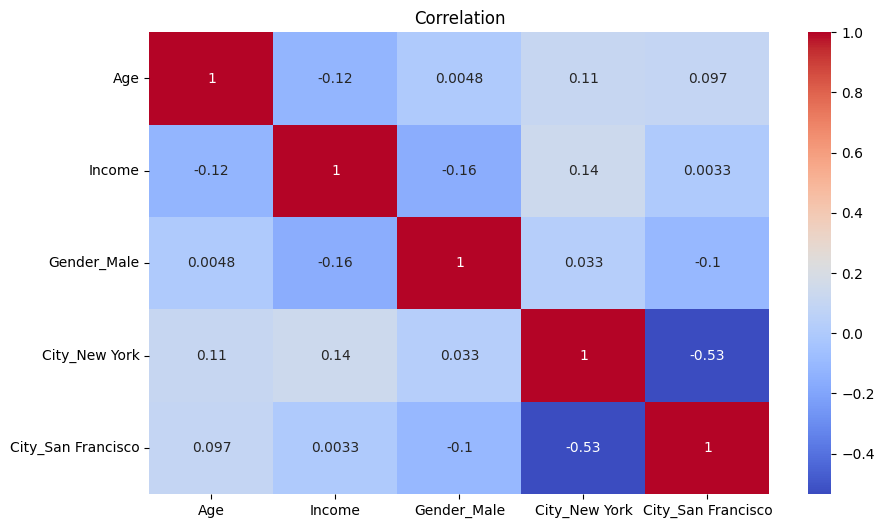

In [17]:
np.random.seed(42)
data={
    'Age':np.random.randint(16,18,100),
    'Income': np.random.randint(20000,30000,100),
    'Gender' :np.random.choice(['Male','Female'],100),
    'City': np.random.choice(['New York','Chicago','San Francisco'],100)
}
df=pd.DataFrame(data)

print(df.info())
print(df.head())

categorical_cols=df.select_dtypes(include=['object']).columns
ohe=OneHotEncoder(sparse_output=False,drop='first')
df_encoded=pd.DataFrame(ohe.fit_transform(df[categorical_cols]),columns=ohe.get_feature_names_out(categorical_cols))
df_encoded.columns=ohe.get_feature_names_out(categorical_cols)
df=df.drop(columns=categorical_cols,axis=1)
df=pd.concat([df,df_encoded],axis=1)

scaler=StandardScaler()
numeric_cols=df.select_dtypes(include=['int64','float64']).columns
df[numeric_cols]=scaler.fit_transform(df[numeric_cols])


plt.figure(figsize=(12,5))
df.hist(figsize=(12,10),bins=30)
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Age'],y=df['Income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age VS Income')
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation')
plt.show()

